# Reinforcement Learning

In this exercise we will look at the problem of balancing a stick in one dimension. This is a traditional problem in reinforcement learning (see for example this [video](https://www.youtube.com/watch?v=J7E6_my3CHk)). The objective is to move a cart back and forth while balancing a stick and making sure that the cart does not move too far to either side. A reward is given proportionally to how long the stick is balanced.

In [1]:
import IPython
IPython.display.HTML("""<svg with=400px height=300px version="1.1" viewBox="0.0 0.0 399.90288713910763 316.742782152231" fill="none" stroke="none" stroke-linecap="square" stroke-miterlimit="10" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg"><clipPath id="p.0"><path d="m0 0l399.9029 0l0 316.74277l-399.9029 0l0 -316.74277z" clip-rule="nonzero"/></clipPath><g clip-path="url(#p.0)"><path fill="#000000" fill-opacity="0.0" d="m0 0l399.9029 0l0 316.74277l-399.9029 0z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m173.08835 14.829396l16.472443 176.62993" fill-rule="evenodd"/><path stroke="#000000" stroke-width="12.0" stroke-linejoin="round" stroke-linecap="butt" d="m173.08835 14.829396l16.472443 176.62993" fill-rule="evenodd"/><path fill="#cfe2f3" d="m119.39633 183.67105l154.77164 0l0 41.196854l-154.77164 0z" fill-rule="evenodd"/><path stroke="#000000" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m119.39633 183.67105l154.77164 0l0 41.196854l-154.77164 0z" fill-rule="evenodd"/><path fill="#cfe2f3" d="m122.39545 231.3068l0 0c0 -7.227539 7.11409 -13.086624 15.8897705 -13.086624l0 0c8.775665 0 15.889755 5.859085 15.889755 13.086624l0 0c0 7.227539 -7.11409 13.086609 -15.889755 13.086609l0 0c-8.775681 0 -15.8897705 -5.85907 -15.8897705 -13.086609z" fill-rule="evenodd"/><path stroke="#000000" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m122.39545 231.3068l0 0c0 -7.227539 7.11409 -13.086624 15.8897705 -13.086624l0 0c8.775665 0 15.889755 5.859085 15.889755 13.086624l0 0c0 7.227539 -7.11409 13.086609 -15.889755 13.086609l0 0c-8.775681 0 -15.8897705 -5.85907 -15.8897705 -13.086609z" fill-rule="evenodd"/><path fill="#cfe2f3" d="m231.48576 231.3068l0 0c0 -7.227539 7.11409 -13.086624 15.889755 -13.086624l0 0c8.775665 0 15.8897705 5.859085 15.8897705 13.086624l0 0c0 7.227539 -7.114105 13.086609 -15.8897705 13.086609l0 0c-8.775665 0 -15.889755 -5.85907 -15.889755 -13.086609z" fill-rule="evenodd"/><path stroke="#000000" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m231.48576 231.3068l0 0c0 -7.227539 7.11409 -13.086624 15.889755 -13.086624l0 0c8.775665 0 15.8897705 5.859085 15.8897705 13.086624l0 0c0 7.227539 -7.114105 13.086609 -15.8897705 13.086609l0 0c-8.775665 0 -15.889755 -5.85907 -15.889755 -13.086609z" fill-rule="evenodd"/><path fill="#cfe2f3" d="m297.5687 201.51212l26.188965 0l0 -2.7952728l5.5905457 5.5905457l-5.5905457 5.5905457l0 -2.7952728l-26.188965 0z" fill-rule="evenodd"/><path stroke="#000000" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m297.5687 201.51212l26.188965 0l0 -2.7952728l5.5905457 5.5905457l-5.5905457 5.5905457l0 -2.7952728l-26.188965 0z" fill-rule="evenodd"/><path fill="#cfe2f3" d="m95.99792 207.05934l-26.188972 0l0 2.795288l-5.5905533 -5.590561l5.5905533 -5.5905457l0 2.7952728l26.188972 0z" fill-rule="evenodd"/><path stroke="#000000" stroke-width="1.0" stroke-linejoin="round" stroke-linecap="butt" d="m95.99792 207.05934l-26.188972 0l0 2.795288l-5.5905533 -5.590561l5.5905533 -5.5905457l0 2.7952728l26.188972 0z" fill-rule="evenodd"/></g></svg>""")

In [2]:
!pip install JSAnimation

  Stored in directory: /root/.cache/pip/wheels/3c/c2/b2/b444dffc3eed9c78139288d301c4009a42c0dd061d3b62cead
Successfully built JSAnimation


We start by defining a function that can display an animation of the system. Do not worry about the details of this.

In [0]:
import random
import math
from matplotlib import pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

random.seed(0)

def animate_states(states):
  fig = plt.figure(figsize=(6.5, 2.5))
  ax = fig.add_axes([0, 0, 1, 1], xlim=(-10.02, 10.02), ylim=(-2.5, 5.02),
                    xticks=range(-10,11), yticks=range(-2,6), aspect='equal', frameon=False)
  ax.grid(True)

  state=states[0]
  stick = ax.plot([state["position"],state["position"]+(4.5*math.cos(state["angle"]+math.pi/2))],[0, 4.5*math.sin(state["angle"]+math.pi/2)], "r-", lw=5)

  p = [stick[0]]

  def animate(nframe):
    state=states[nframe]

    stick[0].set_xdata([state["position"],state["position"]+(4.5*math.cos(state["angle"]+math.pi/2))])
    stick[0].set_ydata([0, 4.5*math.sin(state["angle"]+math.pi/2)])

    return stick

  anim = animation.FuncAnimation(fig, animate, frames=len(states), interval=50)
  return display_animation(anim, default_mode='once')

The system has a state with four dimensions: position of cart, velocity of the cart, angle of the stick and angular velocity of the stick. At every timestep we have the opportunity to apply a force to the cart in either direction.

We start with an initial state that has the cart and stick at rest in the middle and only insert a little bit of randomness to the angle of the stick to get the process running.

At each time use the laws of physics (or something fairly close) to calculate the next state of the system. We will let the system run up to a maximum of 200 time steps.

In [0]:
def evaluate(action_function):
  states=[]
  states.append({"position": 0.0, "angle": random.uniform(-0.1, 0.1), "carspeed": 0.0, "stickspeed":0.0 })
  states[0]["action"] = action_function(states[0])
  
  alpha = 0.1
  beta = 0.02
  gamma = 0.01
  for i in range(200):
    if states[i]["position"]>-10 and states[i]["position"]<10 and states[i]["angle"]>-0.5 and states[i]["angle"]<0.5:
      move=states[i]["action"]
      states.append({"position": states[i]["position"]+states[i]["carspeed"], 
                   "angle": states[i]["angle"]+states[i]["stickspeed"], 
                   "carspeed": states[i]["carspeed"]+alpha*move, 
                   "stickspeed": states[i]["stickspeed"]-math.sin(states[i]["angle"])*beta - gamma*move*math.cos(states[i]["angle"])})
      states[i+1]["action"]=action_function(states[i+1])
    else:
      break
      
  return states

Now, we need a strategy for what actions to take. There are three actions we can choose between at each timestep: negative force (-1), no force (0) and positive force (1). Let us start by having a strategy of choosing between the three options at random.

The **evaluate()** function returns the list of states that the system goes through before it stop because the stick falls, the cart moves too far or we reach 200 time steps.

36



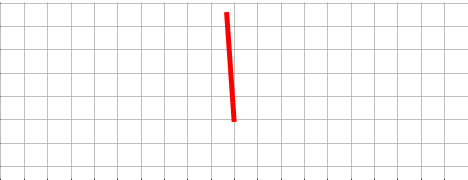
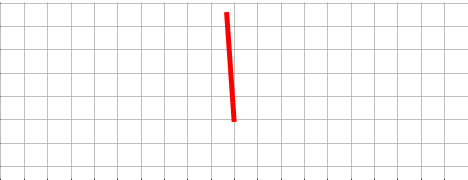
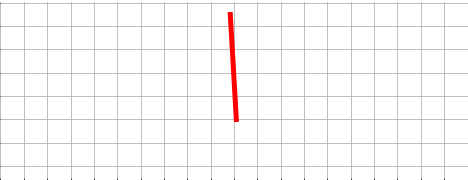
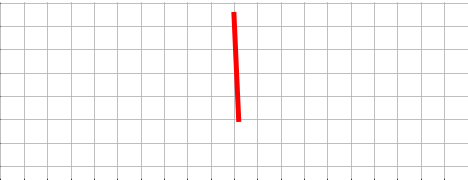
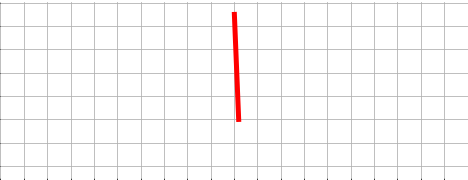
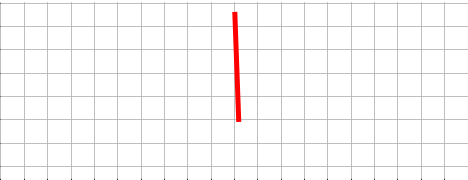
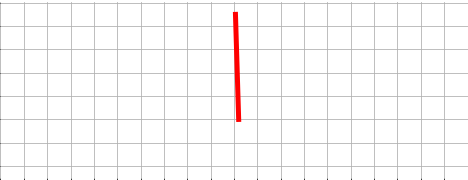
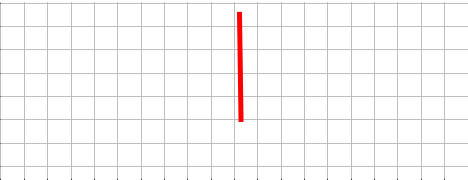
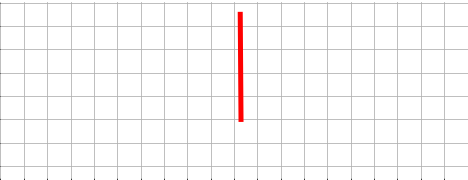
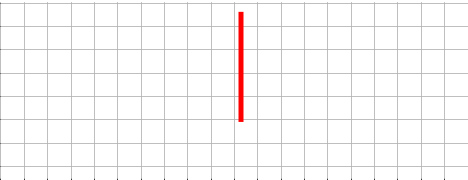
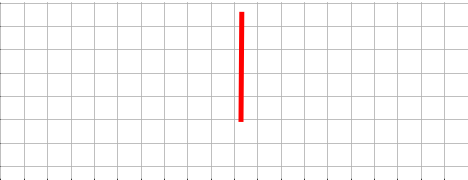
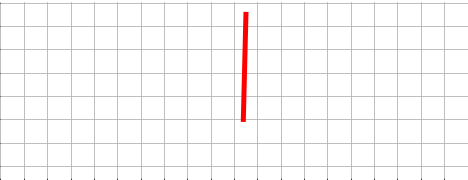
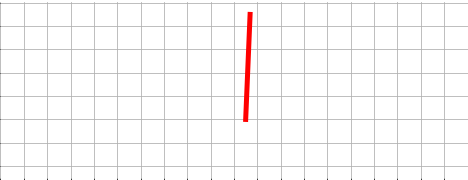
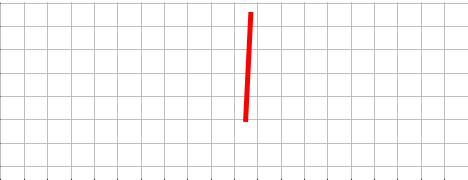
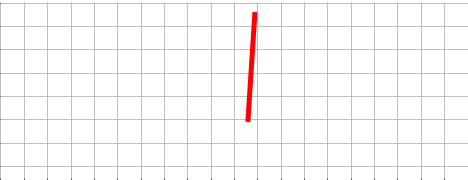
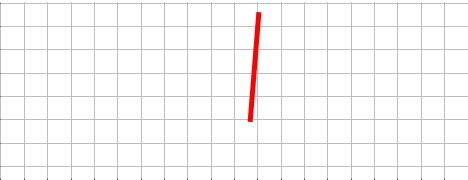
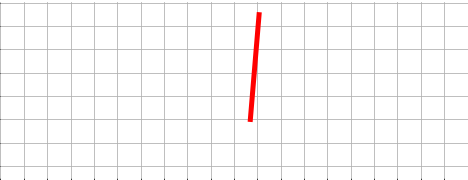
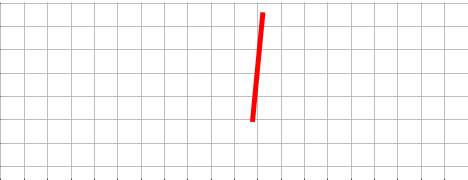
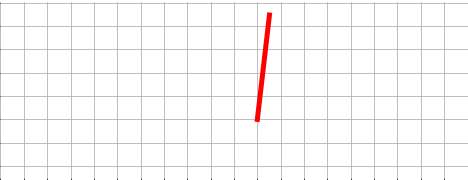
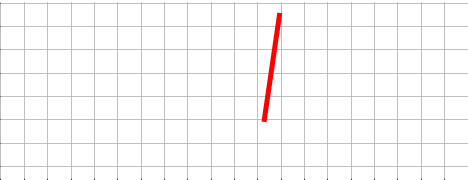
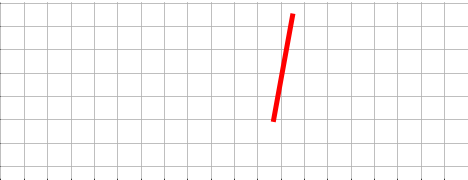
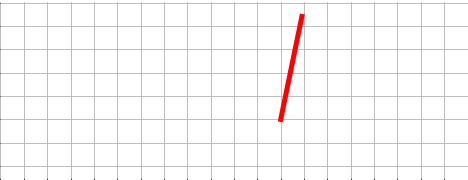
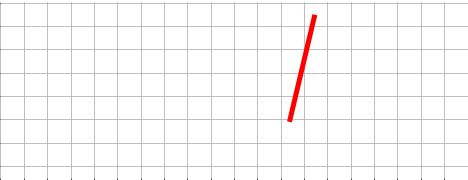
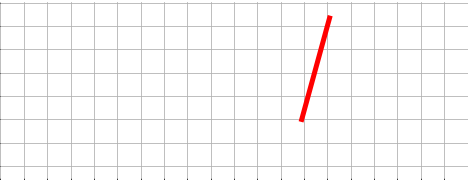
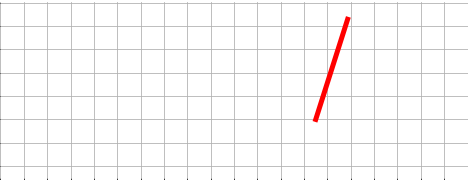
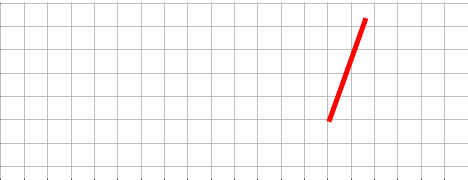
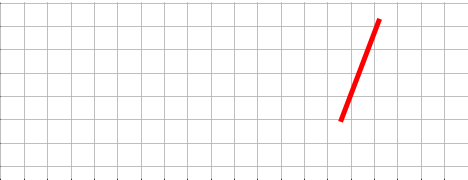
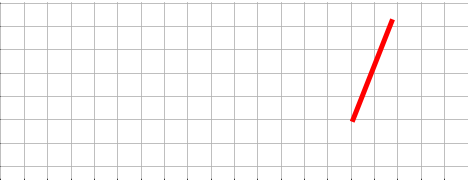
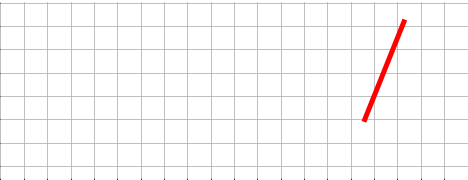
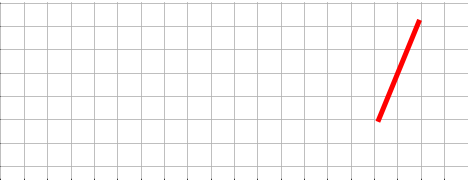
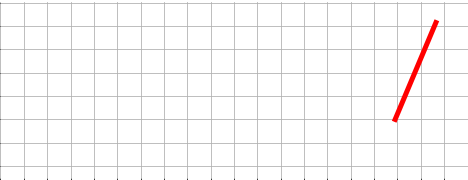
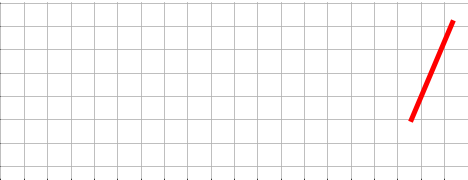
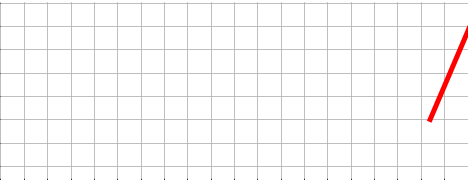
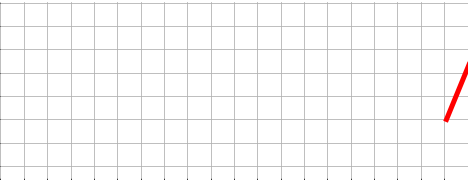
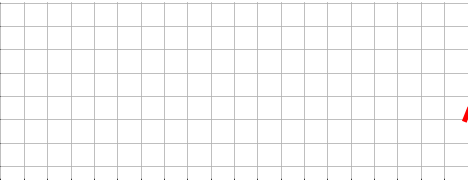
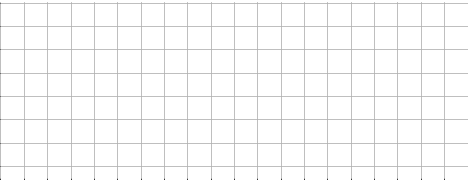

In [5]:
def action(state):
  return round(random.uniform(-1.5,1.5))
  
s = evaluate(action)
print(len(s))
animate_states(s)

There is some randomness in how long the stick balances, so we can do it 100 times and see how long the stick is balanced on average.

In [6]:
def action(state):
  return round(random.uniform(-1.5,1.5))

rewards=[]
for i in range(200):
  s=evaluate(action)
  rewards.append(len(s))

print(sum(rewards)/len(rewards))

45.63


# What would be a better action function?

Can you think of a better function than randomly choosing actions?

One thing we could try is to apply a force in the opposite direction of the angle of the stick.

58



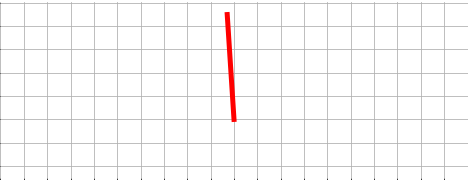
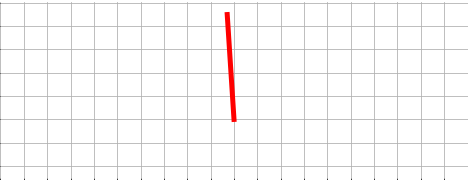
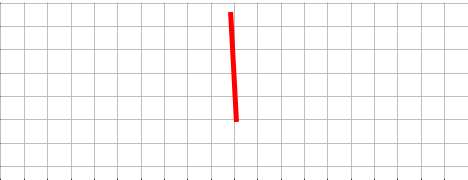
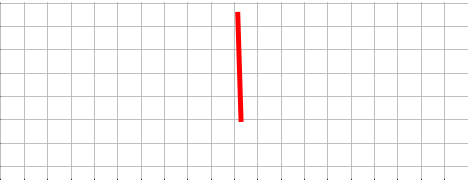
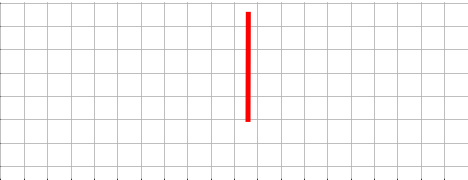
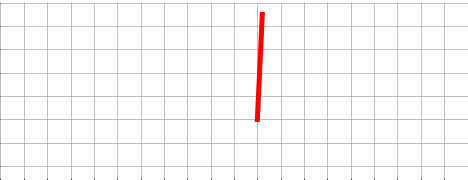
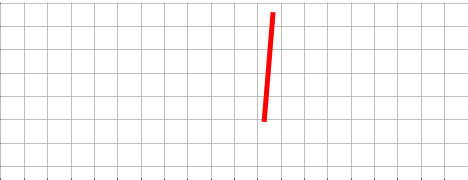
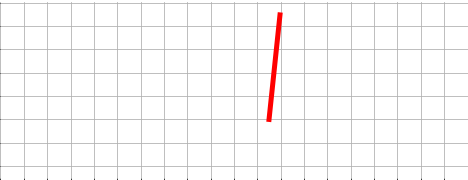
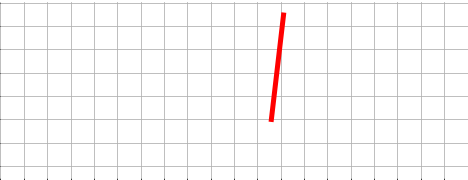
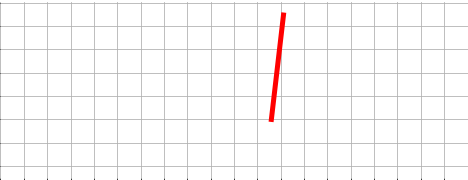
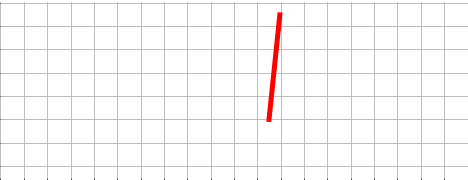
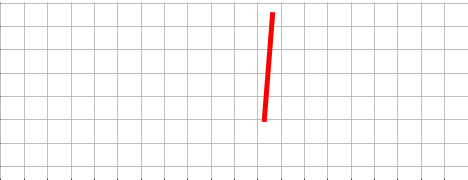
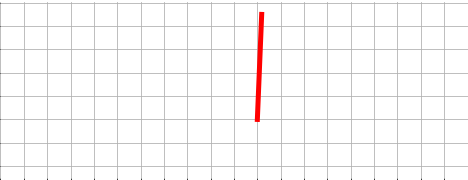
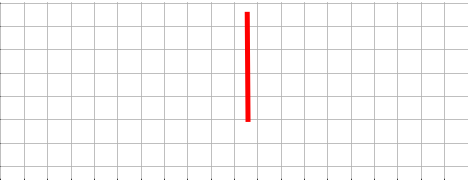
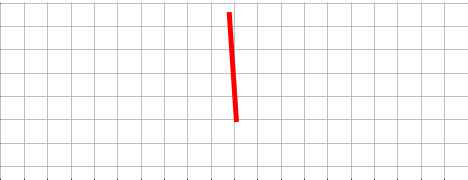
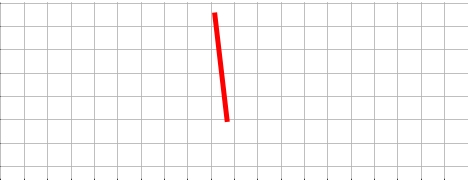
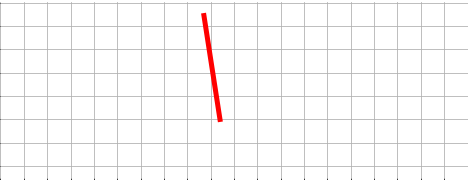
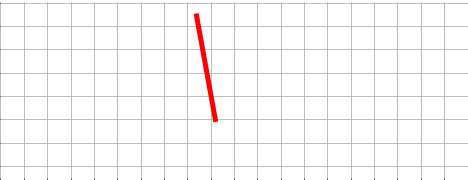
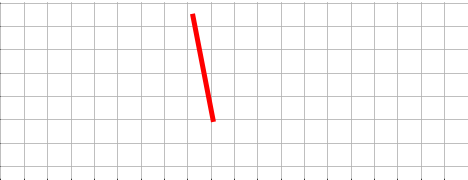
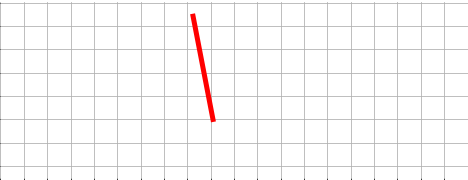
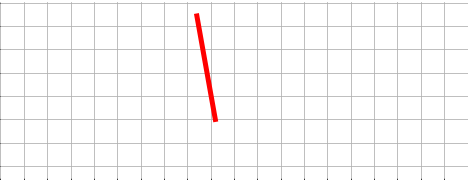
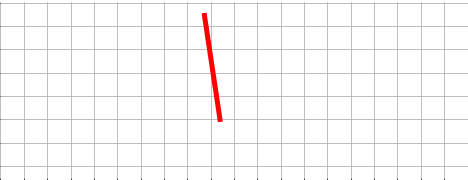
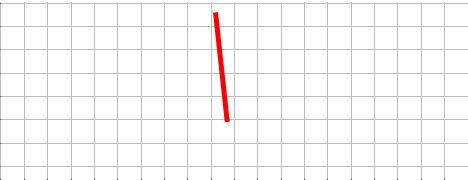
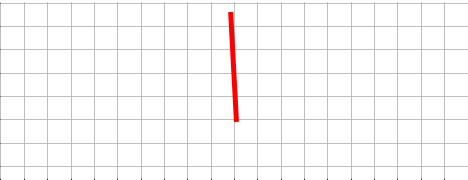
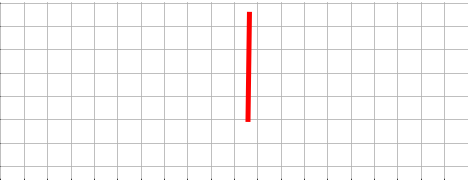
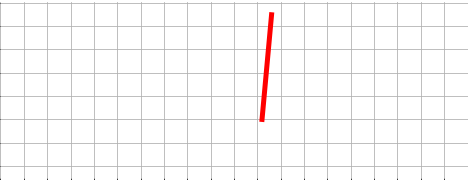
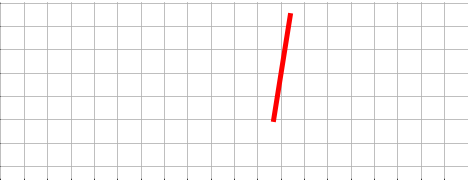
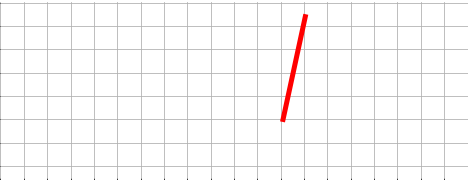
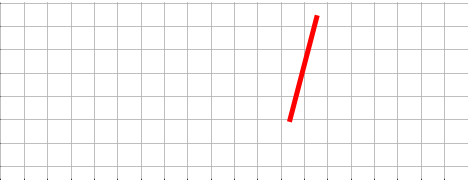
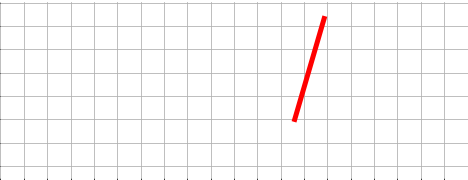
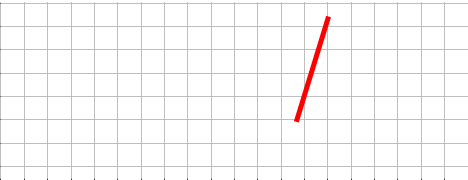
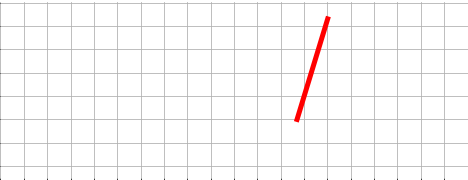
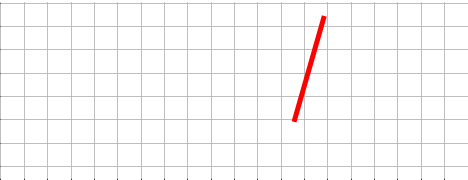
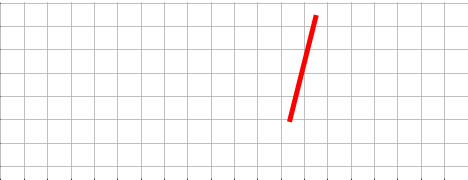
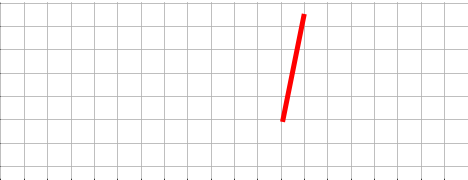
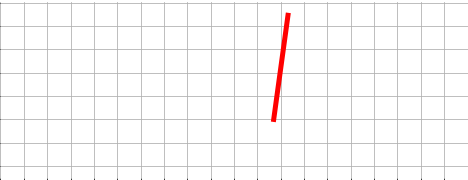
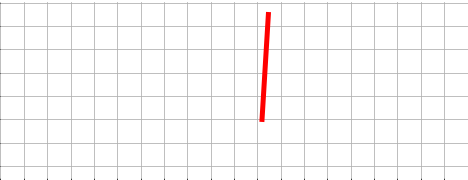
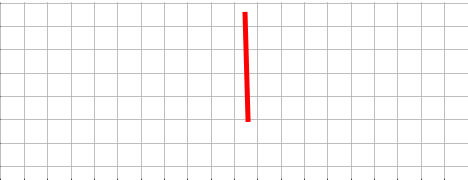
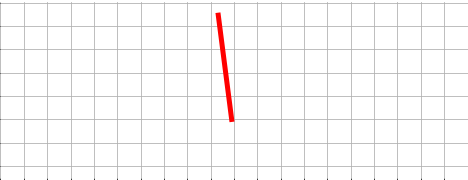
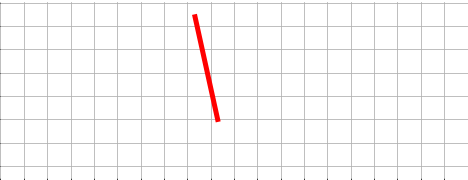
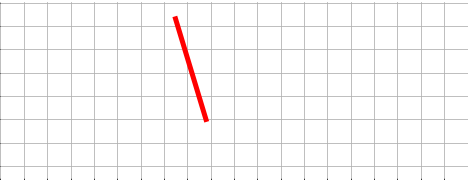
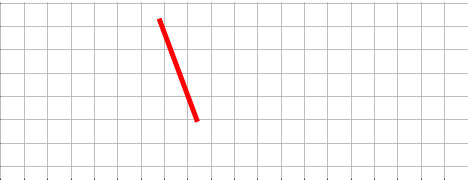
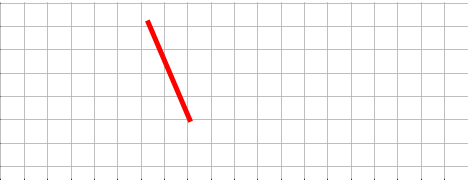
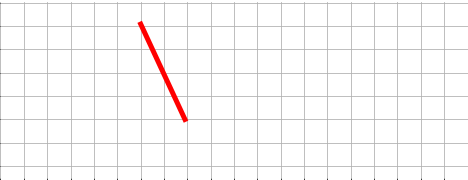
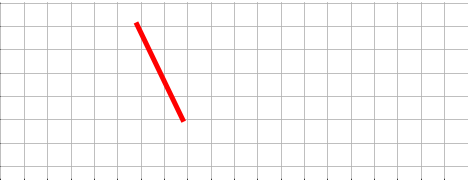
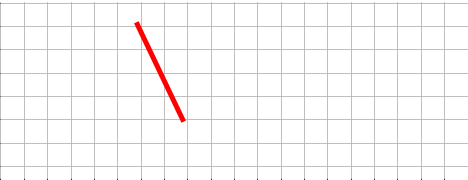
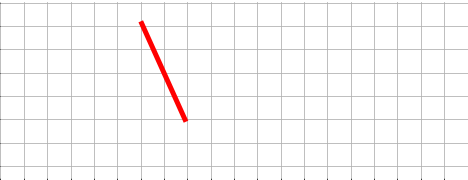
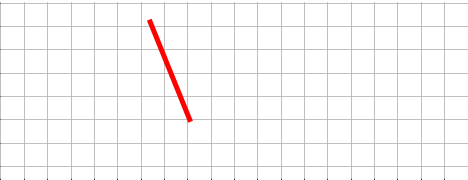
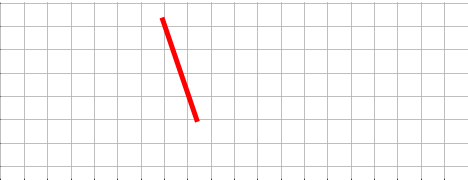
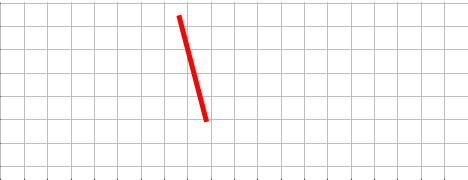
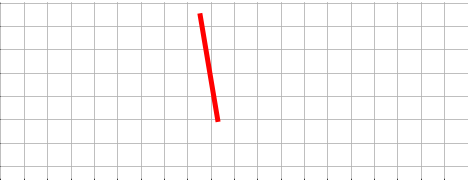
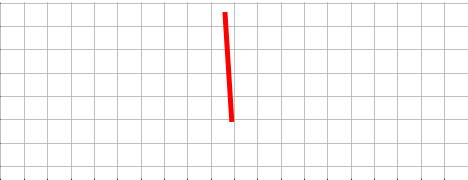
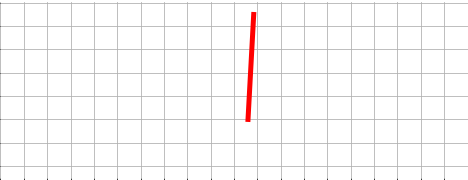
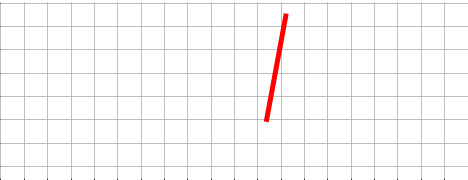
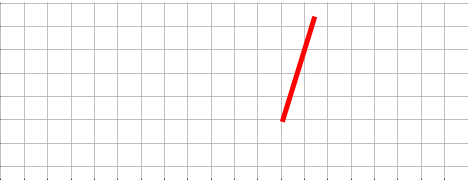
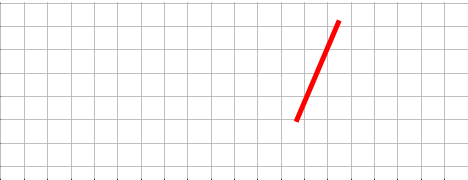
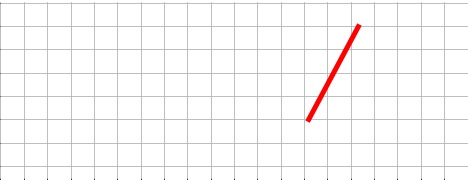
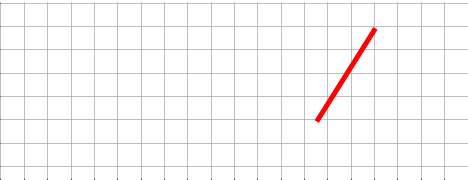

In [7]:
def action(state):
  if state["angle"]>0:
    return 1
  else:
    return -1
  
s = evaluate(action)
print(len(s))
animate_states(s)

This does not do much better than random

In [8]:
def action(state):
  if state["angle"]>0:
    return 1
  else:
    return -1

rewards=[]
for i in range(200):
  s=evaluate(action)
  rewards.append(len(s))

print(sum(rewards)/len(rewards))

48.455


Let us now turn to some actual training. We cannot really do supervised learning, since we do not have any pre-labelled data, but we can do something close to that if we start by doing a number of runs with random action and then try to repeat the actions that performed well.

We start by doing 500 runs and saving the states along with the reward of the total run.

In [0]:
# train
def action(state):
  return round(random.uniform(-1.5,1.5))

train_states=[]
for i in range(500):
  s=evaluate(action)
  for t in s:
    t["reward"]=len(s)
    train_states.append(t)

This gives us ~23.000 states

In [10]:
len(train_states)

23198

The training data we can use to define a new action function. For every step, we find the 30 most similar states in the training data and choose the one that gave us the highest reward. This is the action that we repeat. Hence, we exploid the knowledge that we gained in the training phase. 

In [0]:
def state_dist(state1, state2):
  return abs(state1["position"]-state2["position"]) \
      +abs(state1["carspeed"]-state2["carspeed"]) \
      +abs(state1["angle"]-state2["angle"]) \
      +abs(state1["stickspeed"]-state2["stickspeed"])

k=30
def action(state):
  close=sorted(map(lambda s: {"dist": state_dist(s,state), "reward": s["reward"], "action": s["action"]},train_states), key=lambda x: x["dist"])[0:k]
  best=sorted(close, key=lambda x: -x["reward"])[0]
  return best["action"]
  

And let us see a run with this action function.

162



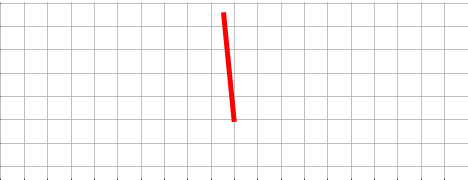
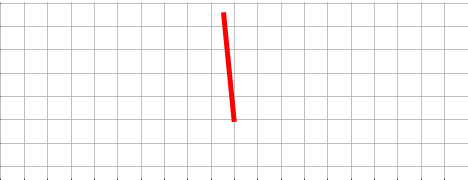
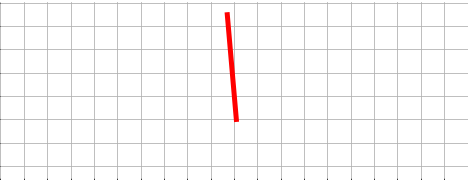
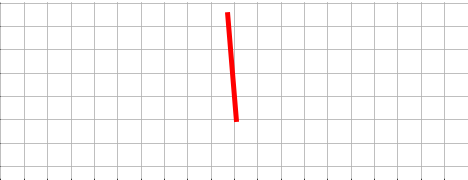
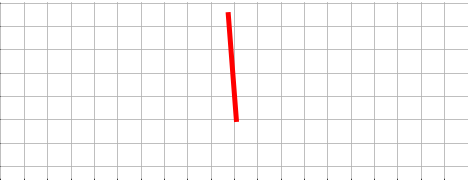
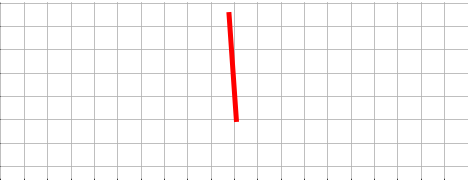
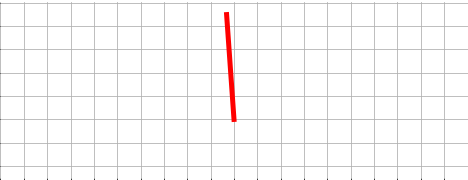
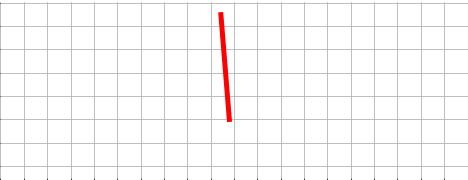
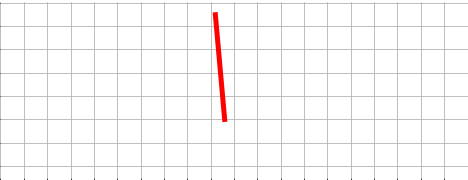
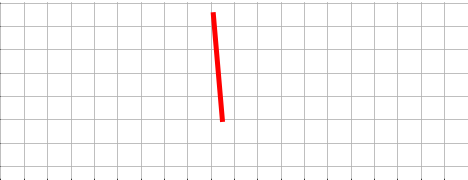
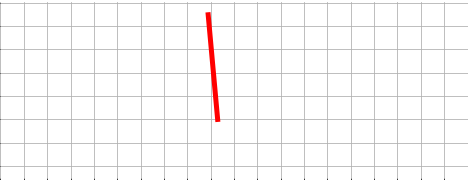
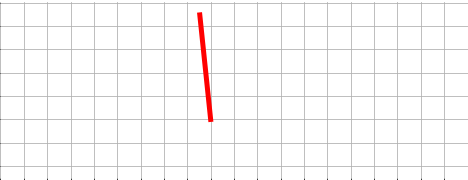
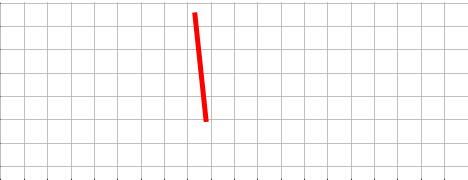
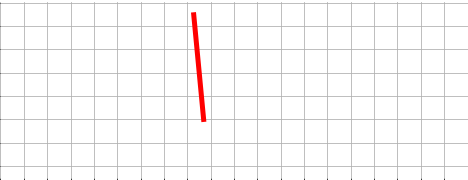
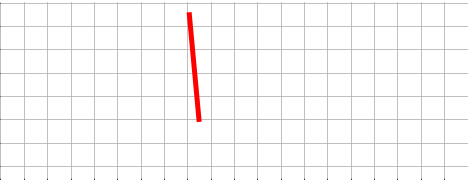
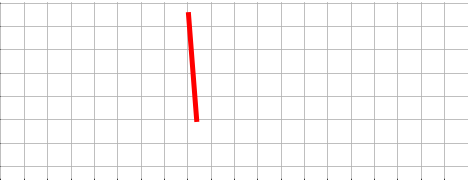
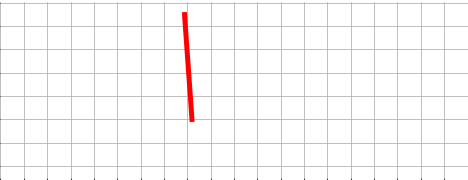
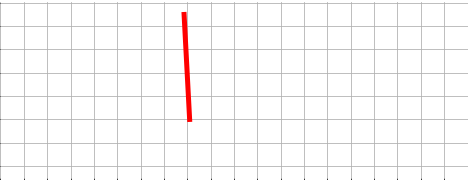
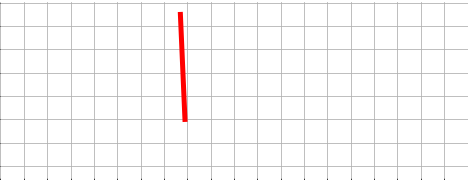
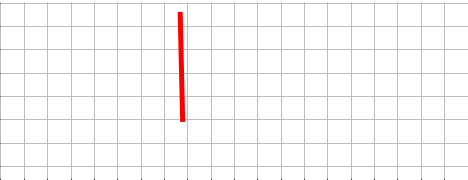
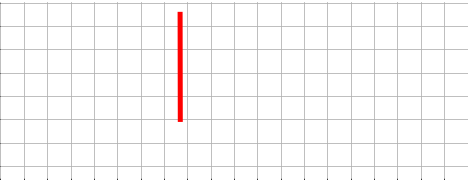
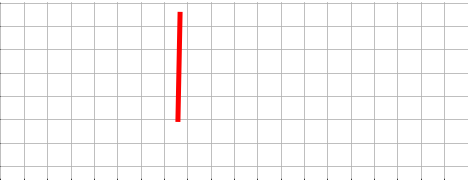
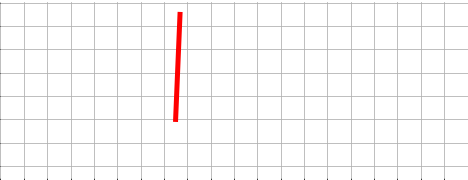
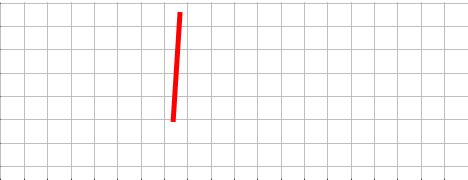
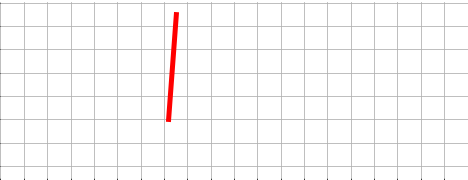
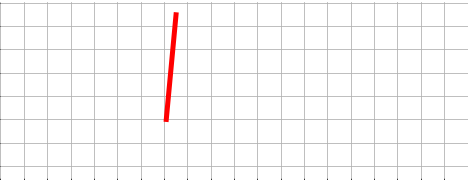
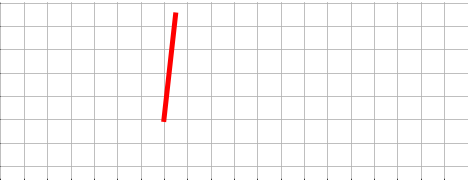
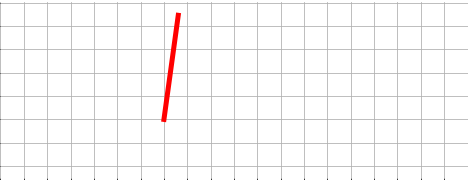
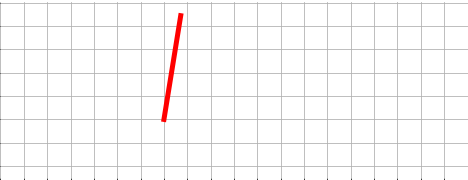
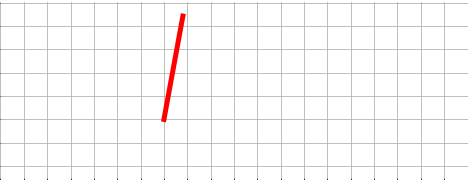
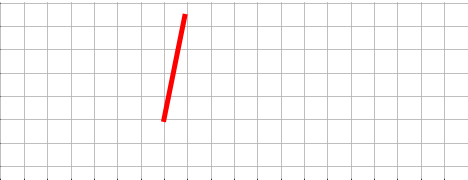
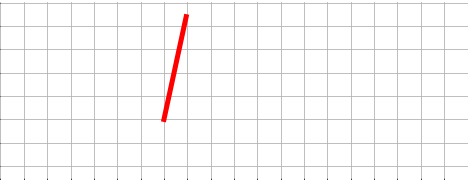
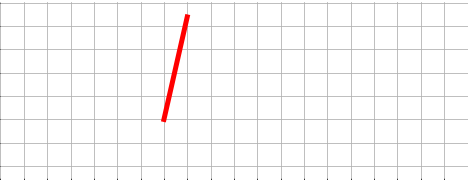
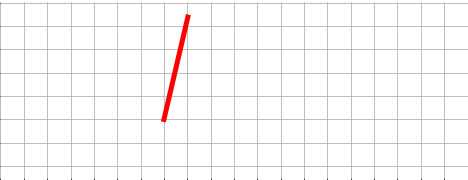
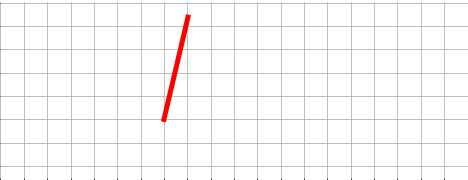
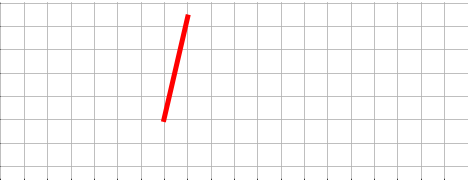
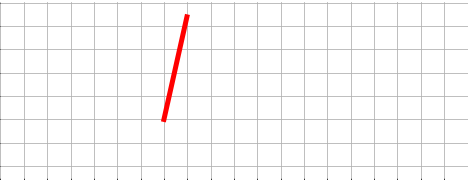
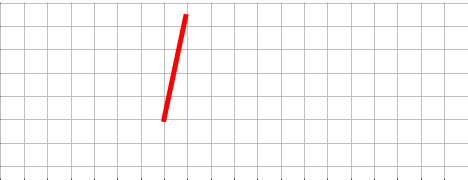
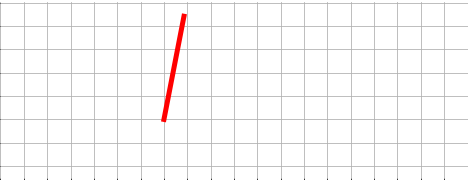
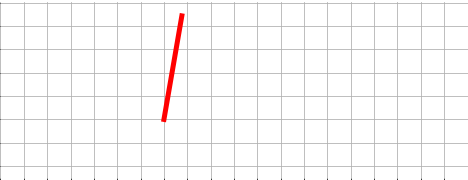
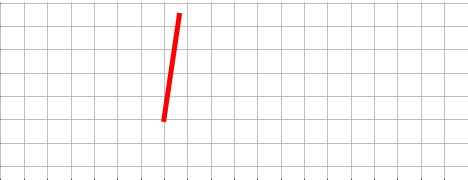
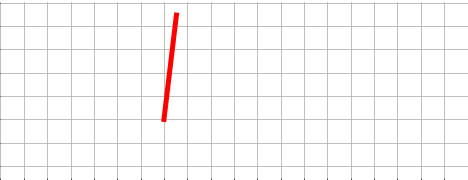
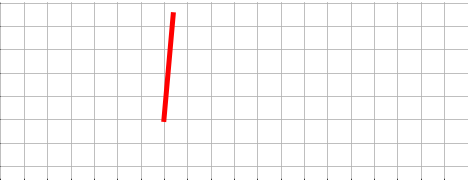
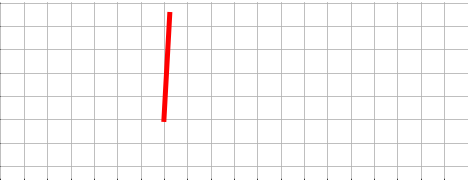
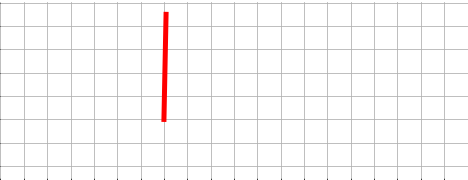
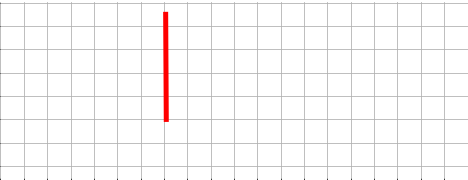
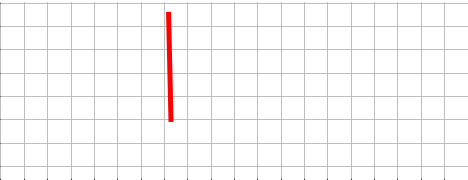
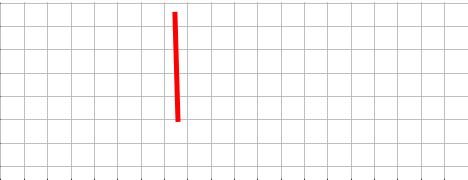
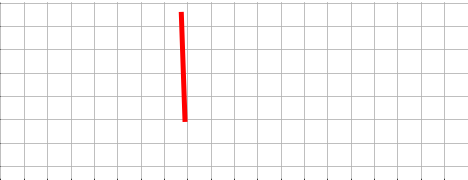
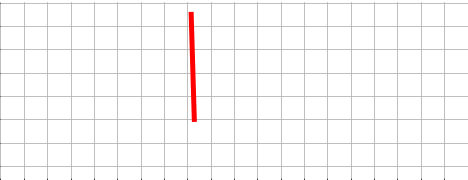
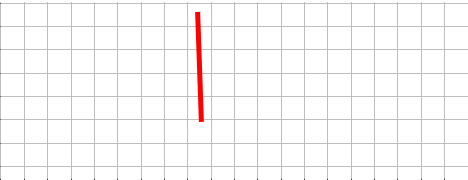
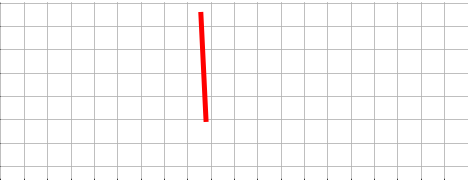
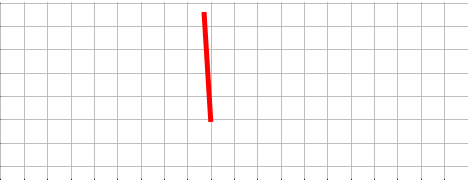
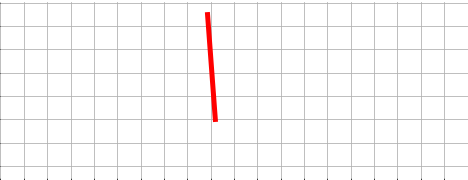
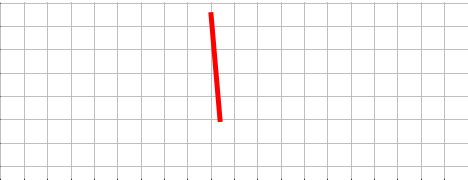
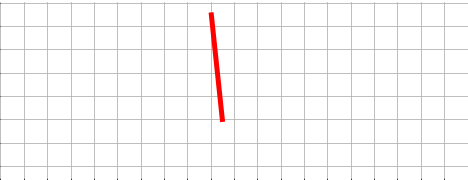
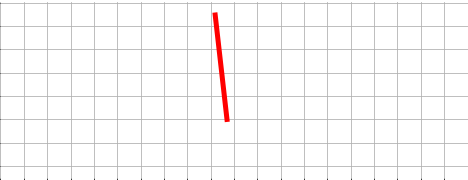
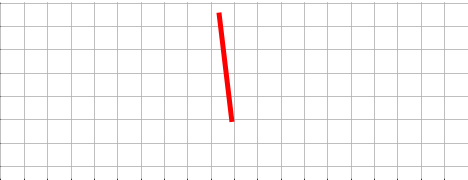
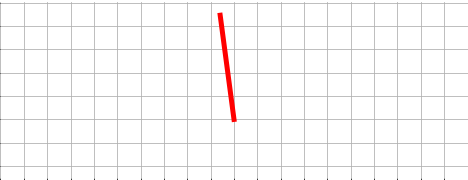
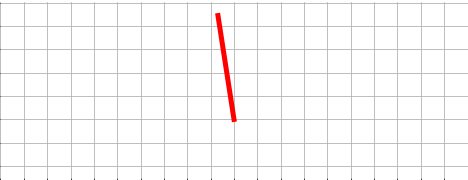
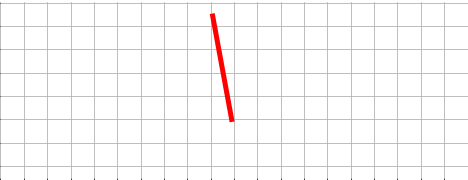
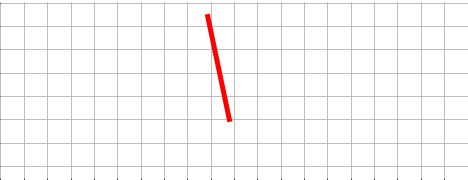
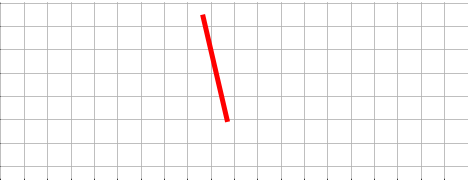
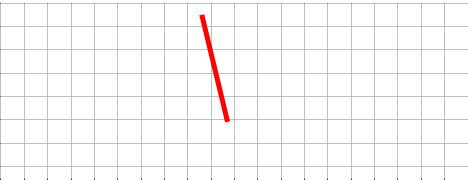
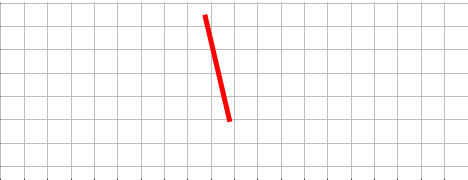
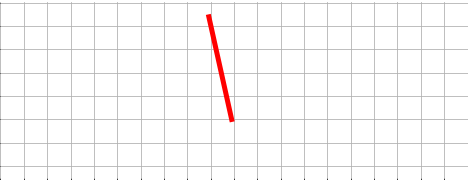
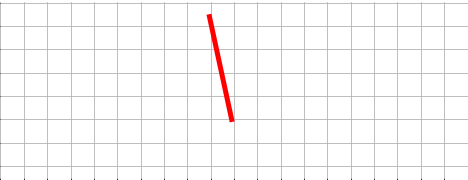
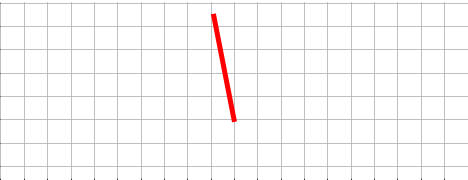
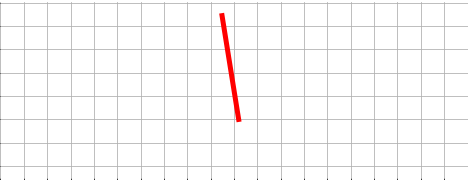
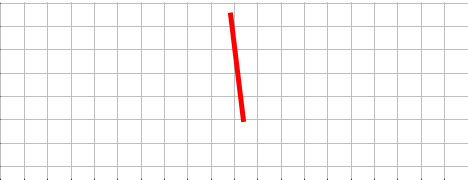
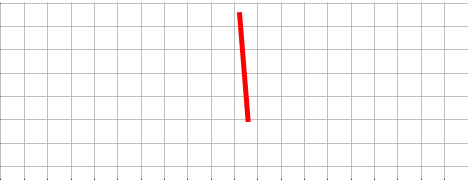
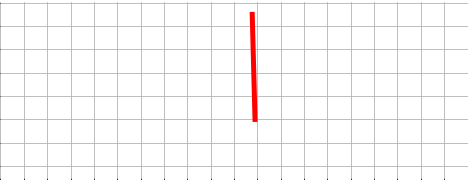
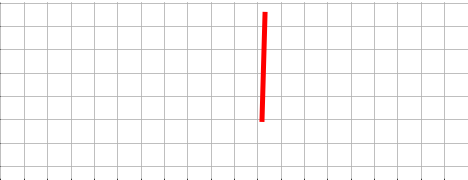
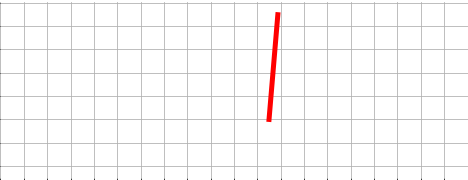
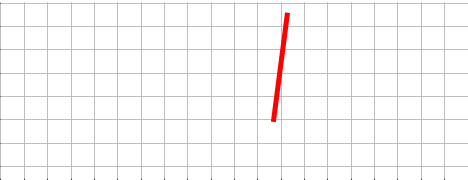
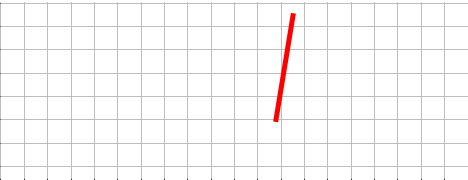
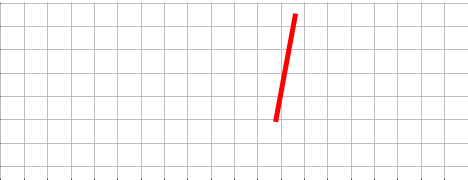
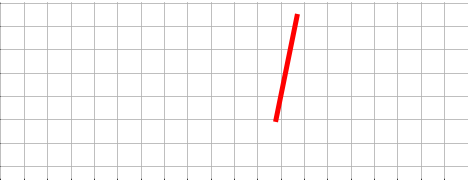
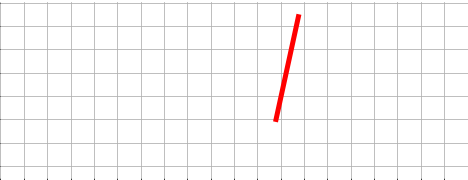
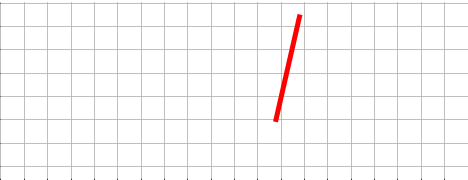
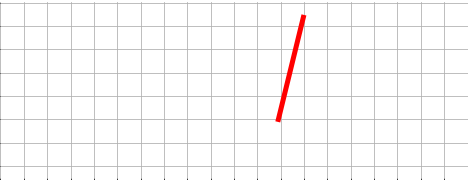
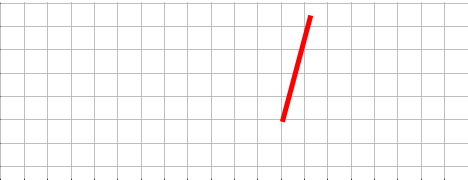
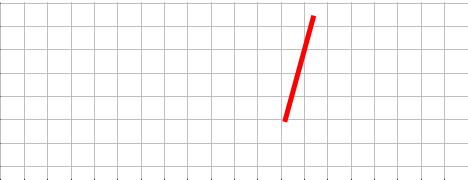
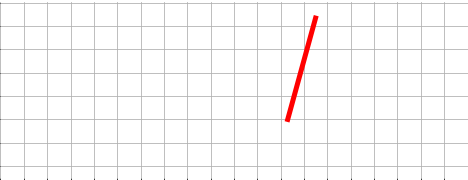
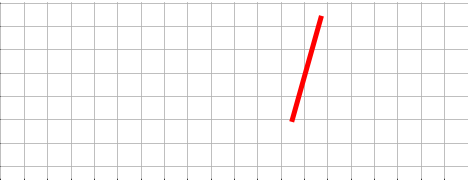
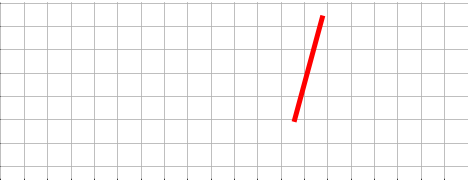
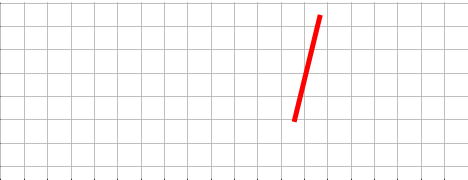
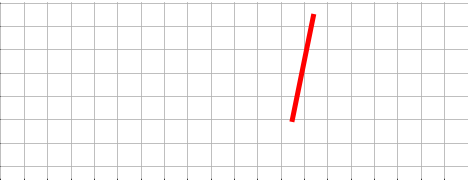
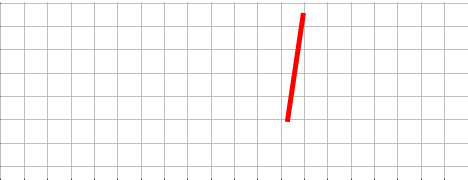
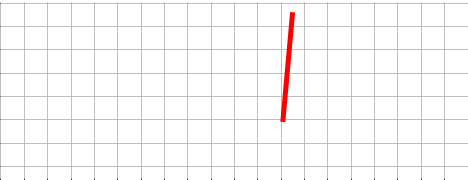
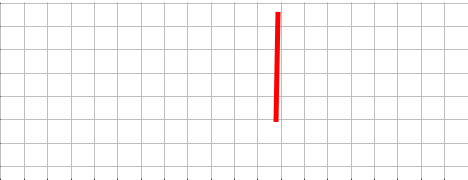
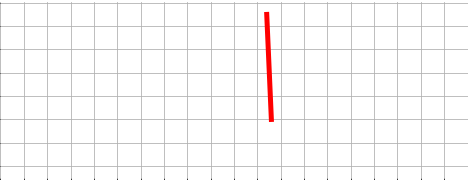
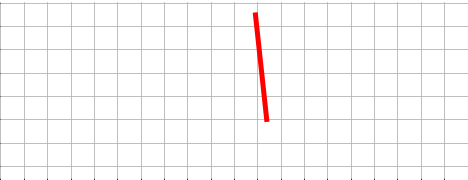
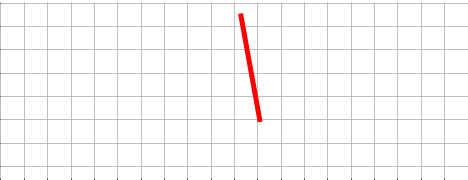
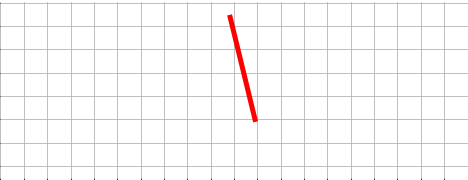
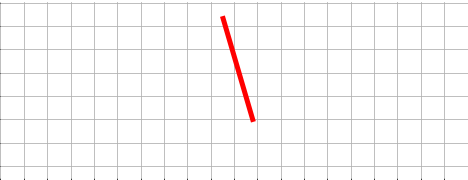
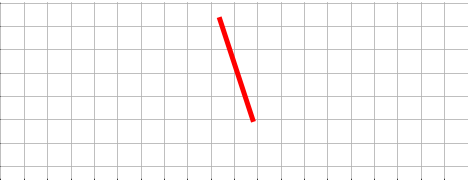
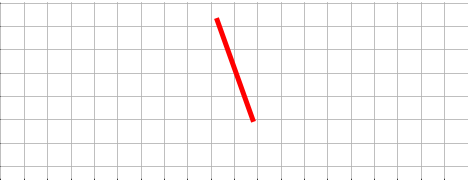
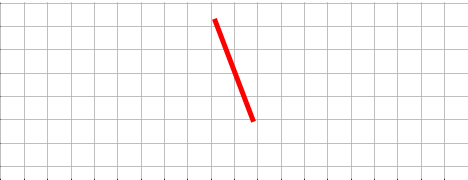
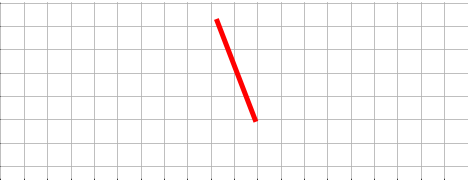
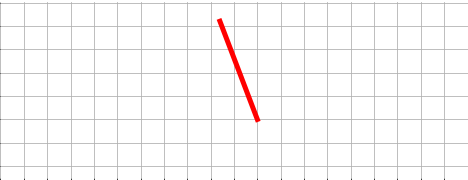
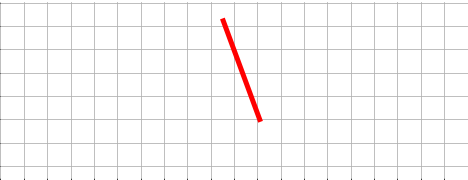
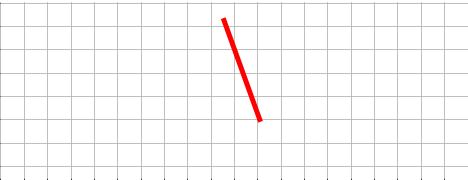
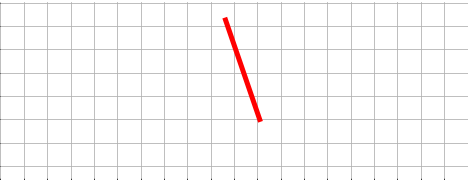
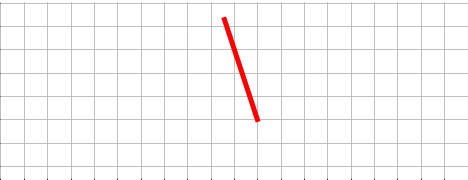
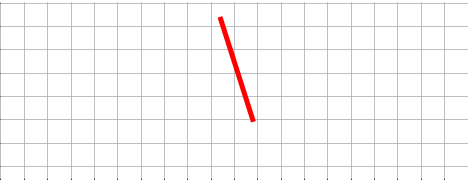
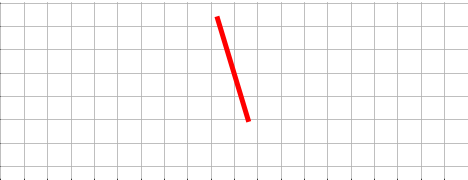
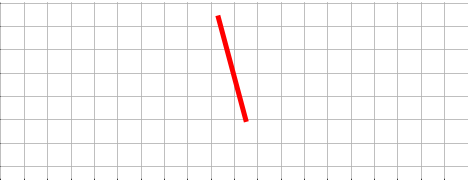
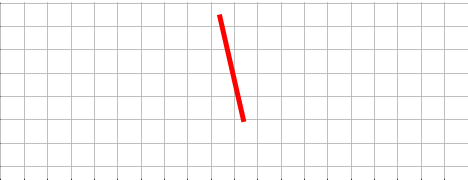
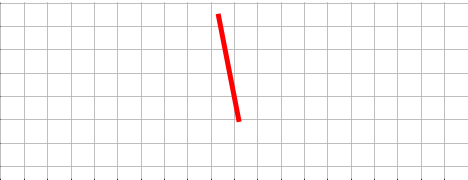
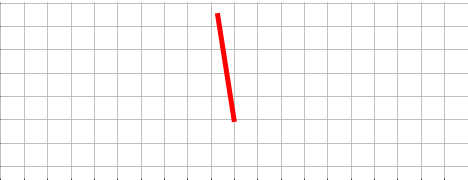
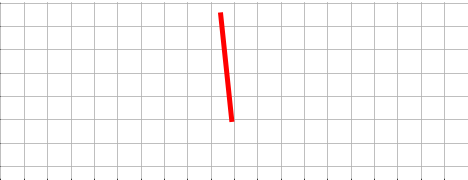
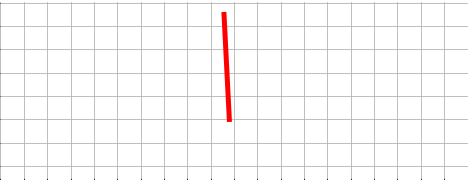
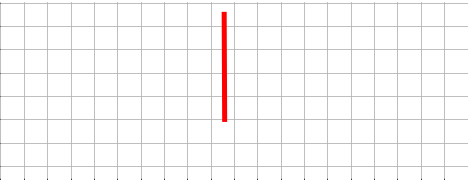
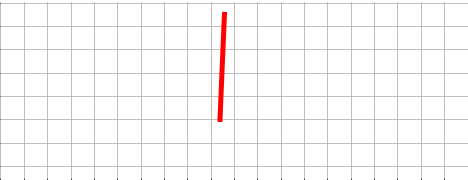
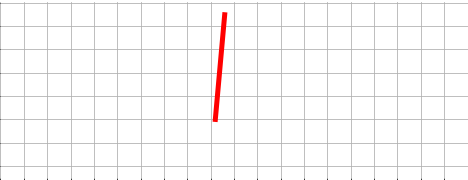
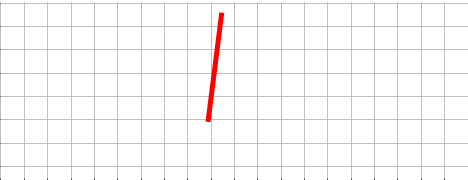
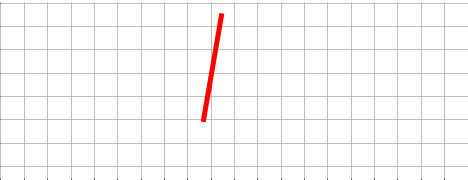
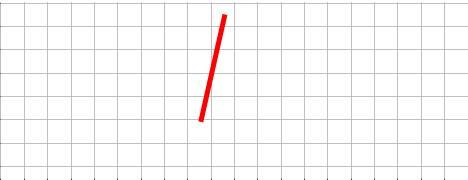
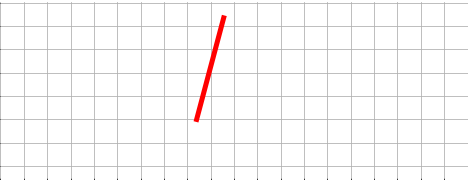
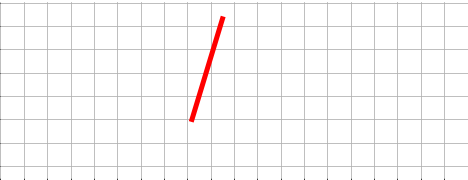
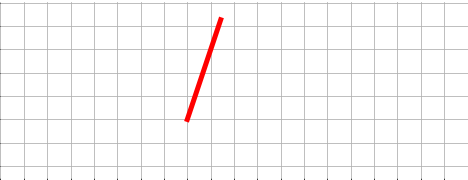
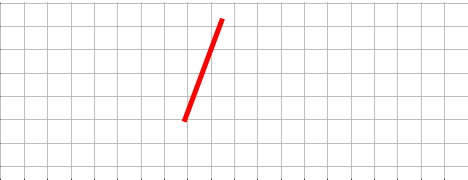
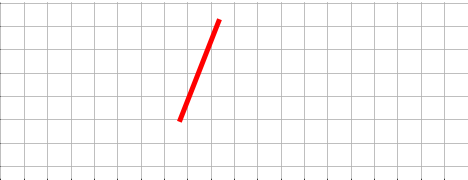
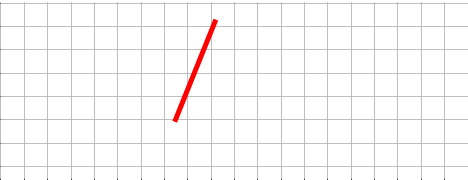
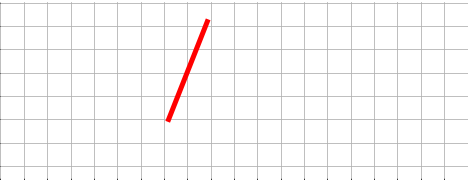
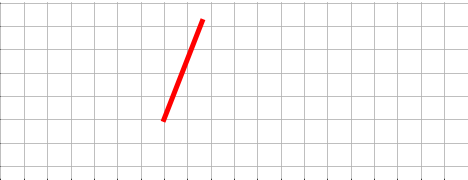
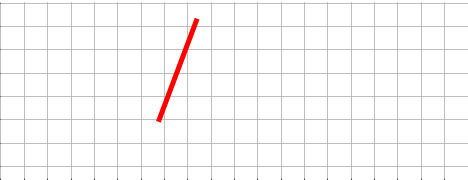
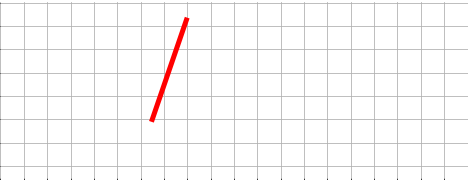
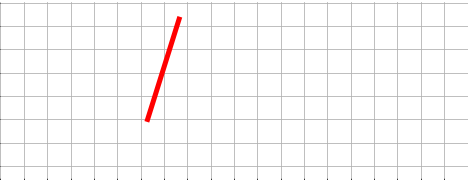
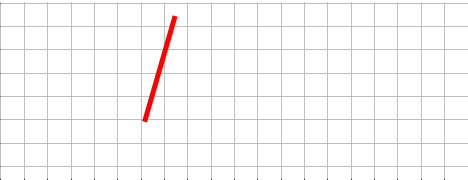
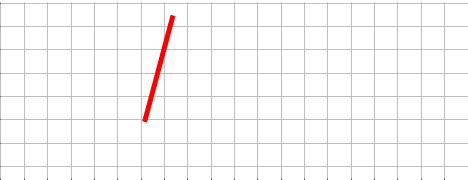
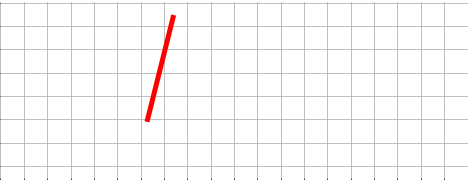
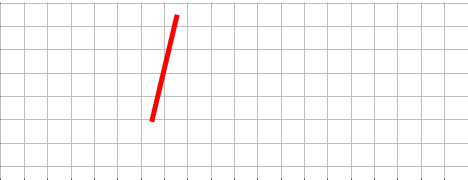
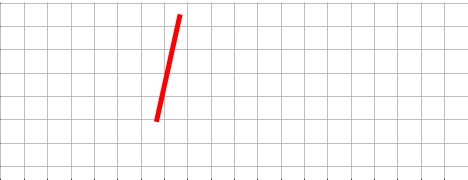
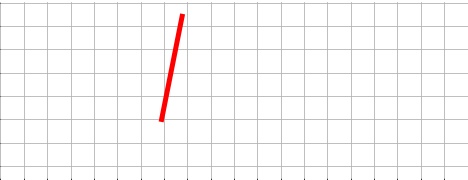
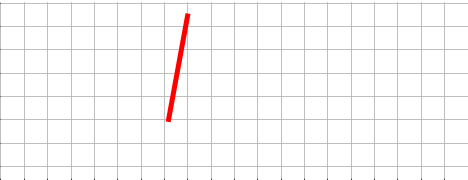
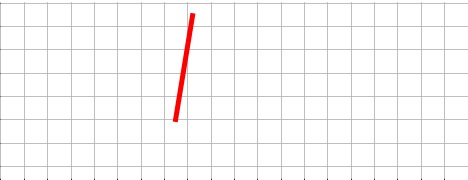
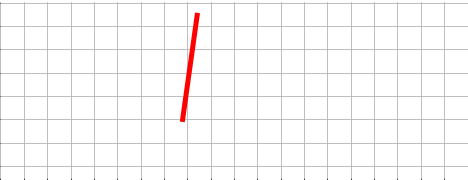
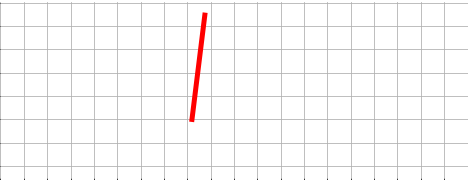
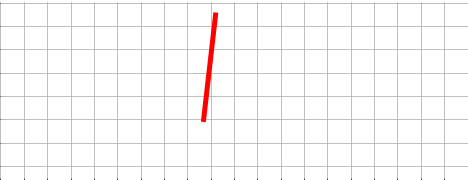
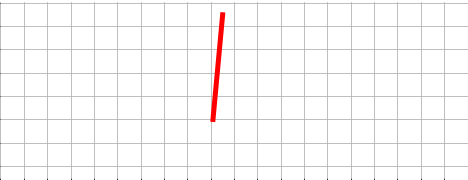
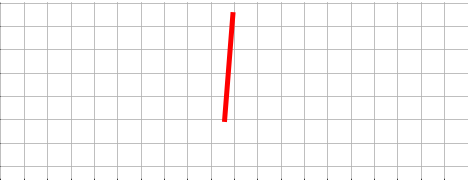
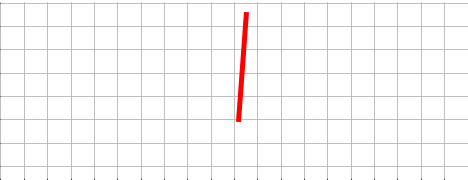
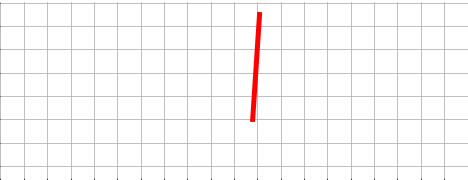
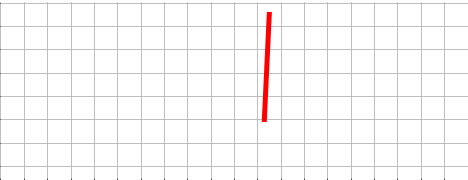
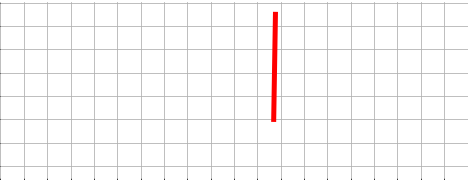
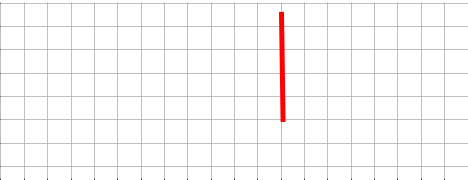
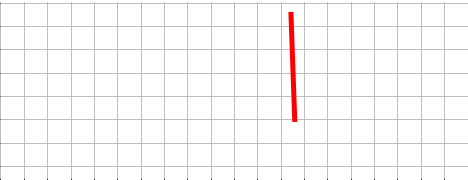
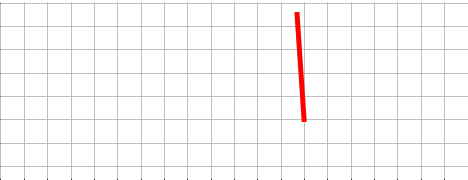
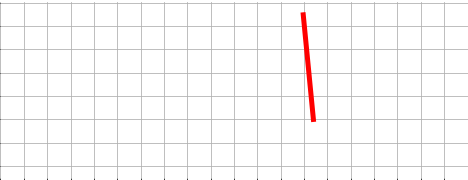
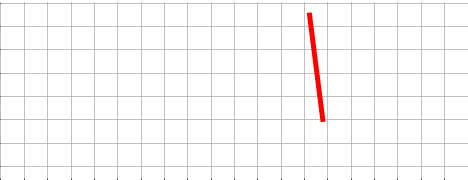
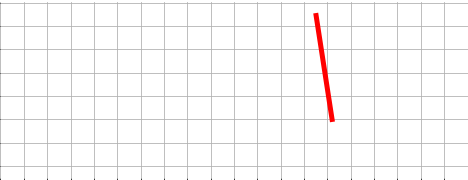
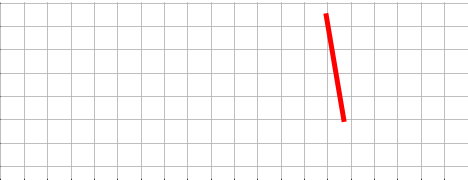
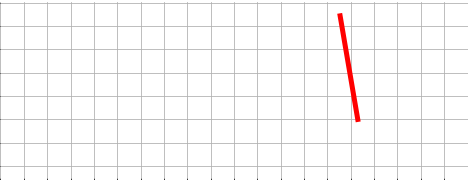
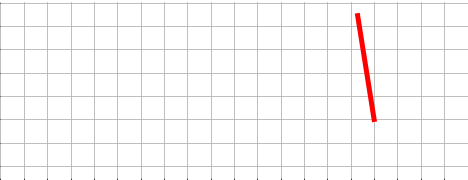
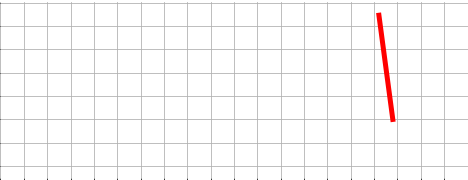
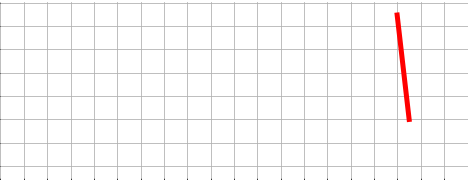
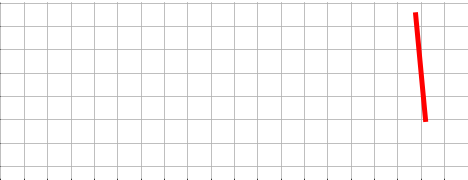
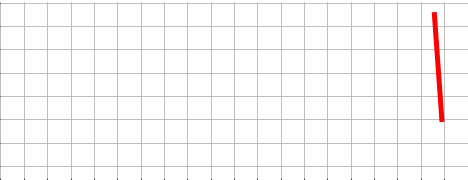
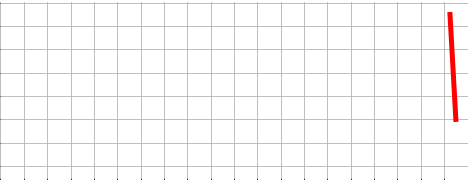
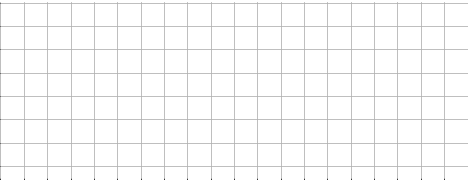

In [12]:
s = evaluate(action)
print(len(s))
animate_states(s)

# Reinforcement learning

It looks better, but we can do better than that with real reinforcement learning. One of the central concepts of reinforcement learning is the trade-off between exploration and exploitation. To begin with we can only explore, because we have no data to exploid yet. So, we introduce an **exploration_rate** that we can decay as we gain more knowledge to exploid.

At every timestep, we choose between taking a random action and taking the action that seems to be the most attractive.

To see if we learn to balance the stick we print the average reward of the 40 most recent runs.

In [13]:
exploration_rate=1.0
exploration_rate_decay=0.99
k=10
train_states=[]

def action(state):
  if len(train_states) > k and random.uniform(0.0, 1.0) > exploration_rate:
    close=sorted(map(lambda s: {"dist": state_dist(s,state), "reward": s["reward"], "action": s["action"]},train_states), key=lambda x: x["dist"])[0:k]
    best=sorted(close, key=lambda x: -x["reward"])[0]
    return best["action"]
  else:
    return round(random.uniform(-1.5,1.5))
  
rewards=[]  
for i in range(300):
  exploration_rate=exploration_rate*exploration_rate_decay
  states=evaluate(action)
  rewards.append(len(states))
  print(sum(rewards[-40:])/len(rewards[-40:]))
  for t in states:
    t["reward"]=len(states)
    train_states.append(t)
    

62.0
66.5
60.0
52.75
49.0
49.5
52.0
51.625
54.333333333333336
52.9
53.0
52.583333333333336
52.07692307692308
51.92857142857143
50.4
49.375
47.529411764705884
46.388888888888886
45.73684210526316
44.9
44.19047619047619
43.81818181818182
43.130434782608695
43.666666666666664
44.12
45.53846153846154
45.370370370370374
44.964285714285715
44.827586206896555
44.46666666666667
43.774193548387096
45.625
45.121212121212125
45.88235294117647
46.68571428571428
49.111111111111114
48.83783783783784
49.526315789473685
50.56410256410256
50.075
49.325
49.3
49.15
49.15
49.575
50.2
49.375
48.875
48.7
49.575
49.425
49.1
50.225
50.55
51.125
51.65
52.875
53.725
56.175
57.45
58.15
58.825
60.475
61.025
60.925
60.425
60.675
63.85
65.475
65.8
68.125
68.0
68.6
67.875
67.575
65.45
65.55
65.775
64.55
64.5
65.1
65.125
65.65
66.85
68.05
68.35
68.35
68.825
67.725
66.85
67.575
68.225
68.25
67.3
67.125
68.025
69.275
68.625
66.025
65.075
65.45
65.8
65.85
65.575
65.225
65.525
65.975
63.2
62.325
62.125
59.975
60.3
61.65


KeyboardInterrupt: ignored